In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
!pip install -U langchain-community -q
#!pip install langchain_huggingface -q
!pip install langchain-chroma -q
!pip install sentence-transformers gradio langchain_groq pypdf -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 4.1 MB/s eta 0:00:00

#### load any pdf you want

In [ ]:
from langchain.document_loaders import PyPDFLoader
path = "/content/Mohamed_ARBI_Nsibi_EN.pdf"
loader = PyPDFLoader(path)
pages= loader.load_and_split()



In [ ]:
pages[0].page_content

'Mohamed Arbi Nsibi\nICT Engineering Student At SUP’COM\nPhone: +216 29 051 246 Email: mohammedarbi.nsibi@supcom.tn Location: Ariana, Tunis\nLinkedIn: linkedin.com/in/mohammed-arbi-nsibi GitHub: github.com/Goodnight77\nPROFILE\nAspiring Machine Learning Engineer with experience in AI-powered systems and model development. Former GDSC Lead\nand current mentor at SUP’COM. Strong in TensorFlow, Keras, and PyTorch. Built an automated candidate matching\nsystem and invoice verification models. Passionate about driving AI innovation.\nEDUCATION\nICT Engineer’s degree Higher school of communication (SUP’COM) 2022-2024\n• Principal coursework : Probability, Statistical inference, Algorithmic Foundations of Optimization, Cloud, Big Data,\nData science, Artificial intelligence.\nDegree in Physics and Chemistry Preparatory Institute For Engineering Studies of TUNIS (IPEIT) 2020-2022\n• Ranked 70/1400 in the national entrance exam for engineering schools.\nPROFESSIONAL EXPERIENCE\nAI Intern, Omicr

In [ ]:
len(pages)

2

### Data ingestion

#### SeleniumURLLoader (URL)

In [ ]:
!pip install -q unstructured selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 27.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 10.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.16.1 requires aiofiles<24.0,>=22.0, but you have aiofiles

In [ ]:
from langchain.document_loaders import SeleniumURLLoader

urls= [
    "https://python.langchain.com/docs/integrations/chat/groq/",
    #"https://www.ibm.com/think/topics/langchain"
]
loader =SeleniumURLLoader(urls=urls)
data =loader.load()
print(data[0].page_content)

#### **1-Character Text Splitter**

###### offer 2 customization: size of each chunk and overlap between chunks => manageable segments and maintaining semantic continuity across them .It splits the text sequentially without considering the structure or meaning of the text.

* When you need to split text into equal-sized chunks without regard for semantic boundaries.

* Useful for simple tasks where the structure of the text is not important, such as preprocessing for tokenization or basic text analysis.
* Preserves Structure	No
* Splitting Method	Fixed character count or simple separator


[CharacterTextSplitter](https://api.python.langchain.com/en/latest/text_splitters/character/langchain_text_splitters.character.CharacterTextSplitter.html)

In [ ]:
text = "this is the text i want to chunk. it is just an example of text for this section"

In [ ]:
chunks= []
chunk_size= 30
for i in range(0, len(text),chunk_size):
  chunk= text[i: i+chunk_size]
  chunks.append(chunk)
chunks



['this is the text i want to chu',
 'nk. it is just an example of t',
 'ext for this section']

In [ ]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(
    chunk_size=30,
    chunk_overlap=4,
    separator ='chunk'
    )

text_splitter.create_documents([text]) # expect list output document object with metadata


[Document(metadata={}, page_content='this is the text i want to'),
 Document(metadata={}, page_content='. it is just an example of text for this section')]

In [ ]:
text_splitter = CharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=20 ,
    separator =''
    )

text_char_splitter= text_splitter.split_documents(pages)
text_char_splitter[0]

Document(metadata={'producer': 'pdfTeX-1.40.25', 'creator': "LaTeX with 'moderncv' package", 'creationdate': '2025-02-02T23:34:38+00:00', 'author': 'Mohamed Arbi Nsibi', 'keywords': 'Mohamed Arbi Nsibi , curriculum vitæ, résumé', 'moddate': '2025-02-02T23:34:38+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'subject': 'Résumé of Mohamed Arbi Nsibi', 'title': 'Mohamed Arbi Nsibi  –', 'trapped': '/False', 'source': '/content/Mohamed_ARBI_Nsibi_EN.pdf', 'total_pages': 2, 'page': 0, 'page_label': '1'}, page_content='Mohamed Arbi Nsibi\nICT Engineering Student At SUP’COM\nPhone: +216 29 051 246 Email: mohammedarbi.nsibi@supcom.tn Location: Ariana, Tunis\nLinkedIn: linkedin.com/in/mohammed-arbi-nsibi GitHub: github.co')

In [ ]:
text_char_splitter[0].page_content

'Mohamed Arbi Nsibi\nICT Engineering Student At SUP’COM\nPhone: +216 29 051 246 Email: mohammedarbi.nsibi@supcom.tn Location: Ariana, Tunis\nLinkedIn: linkedin.com/in/mohammed-arbi-nsibi GitHub: github.co'

In [ ]:
len(text_char_splitter)

31

[chunk viz](https://chunkviz.up.railway.app/)

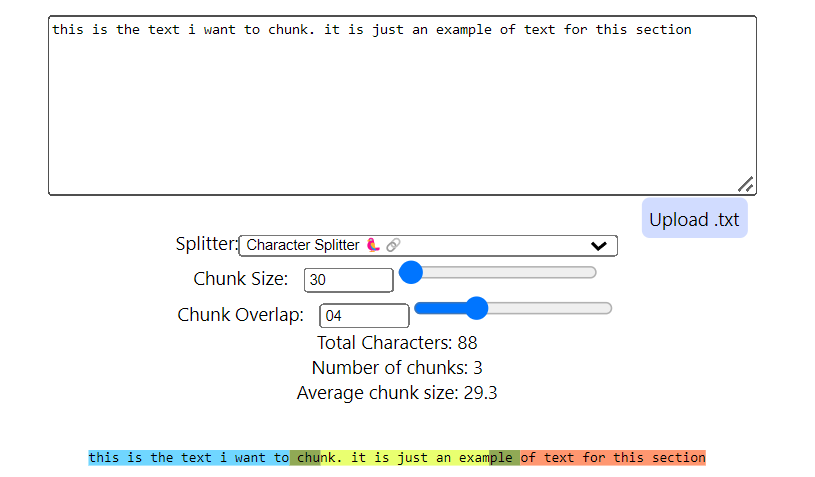

#### **2-Recursive Character Text Splitter**
###### look at physical structure of text
###### chunk based on predifined list of characters default = ["\n\n", "\n", " "] parag, senteneces , words... at first it divide text using two newline characters if chunks more extensive than desired splitter tries using single newline and 1 space and so on until size is attained

* This splitter recursively tries to split text based on a hierarchy of separators (e.g., paragraphs, sentences, words). It first attempts to split by larger chunks (e.g., paragraphs), and if the resulting chunks are too large, it recursively splits them further using smaller separators (e.g., sentences, then words).
* Ideal for tasks like document processing, natural language processing (NLP), or when feeding text into language models where context and coherence are important.
* Preserves Structure Yes (e.g., paragraphs, sentences, words)
* Splitting Method :Recursively splits using a hierarchy of separators

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter =RecursiveCharacterTextSplitter(
    chunk_size=50,
    chunk_overlap=20, # default 20
    length_function=len, # count length of chunks, len counts number of character
    # set token counter could be + when working with models with token limits # exple GPT3 4096token/request
)

text = """Now is the time to stop and enjoy the view! This time of year,
nature's beauty is on full display. It can be hard to capture your love
for the outdoors in a short message, but these nature quotes can help!
Share these words with your friends on social media, or jot them down in
your journal for future reflection. Whether you're a fan of the beach, the mountains,
or your back porch, nature is worth celebrating. If you're looking for the perfect words
 to caption your Instagram posts, many of these quotes will double as nature Instagram captions."""
docs = text_splitter.create_documents([text])
docs

[Document(metadata={}, page_content='Now is the time to stop and enjoy the view! This'),
 Document(metadata={}, page_content='the view! This time of year,'),
 Document(metadata={}, page_content="nature's beauty is on full display. It can be"),
 Document(metadata={}, page_content='display. It can be hard to capture your love'),
 Document(metadata={}, page_content='for the outdoors in a short message, but these'),
 Document(metadata={}, page_content='message, but these nature quotes can help!'),
 Document(metadata={}, page_content='Share these words with your friends on social'),
 Document(metadata={}, page_content='friends on social media, or jot them down in'),
 Document(metadata={}, page_content='your journal for future reflection. Whether'),
 Document(metadata={}, page_content="reflection. Whether you're a fan of the beach,"),
 Document(metadata={}, page_content='a fan of the beach, the mountains,'),
 Document(metadata={}, page_content='or your back porch, nature is worth celebrating

#### Markdown


In [ ]:
from langchain.text_splitter import MarkdownTextSplitter
splitter = MarkdownTextSplitter(chunk_size = 50, chunk_overlap=0)

markdown_text = """
# RAG workshop

## vector store

vector stores like pinecone,FAISS,..
### embedding model

embedding model convert data into vectors
## Generator
Use one of the open source llm
"""
splitter.create_documents([markdown_text])


[Document(metadata={}, page_content='# RAG workshop \n\n## vector store'),
 Document(metadata={}, page_content='vector stores like pinecone,FAISS,..'),
 Document(metadata={}, page_content='### embedding model'),
 Document(metadata={}, page_content='embedding model convert data into vectors'),
 Document(metadata={}, page_content='## Generator\nUse one of the open source llm')]

#### Python

In [ ]:
from langchain.text_splitter import PythonCodeTextSplitter

python_text = """
class Person:
  def __init__(self, name, age):
    self.name = name
    self.age = age

p1 = Person("John", 36)

for i in range(10):
    print (i)
"""
python_splitter = PythonCodeTextSplitter(chunk_size=100, chunk_overlap=0)
python_splitter.create_documents([python_text])


[Document(metadata={}, page_content='class Person:\n  def __init__(self, name, age):\n    self.name = name\n    self.age = age'),
 Document(metadata={}, page_content='p1 = Person("John", 36)\n\nfor i in range(10):\n    print (i)')]

#### JS

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, Language
javascript_text = """
// Function is called, the return value will end up in x
let x = myFunction(4, 3);

function myFunction(a, b) {
// Function returns the product of a and b
  return a * b;
}
"""
js_splitter = RecursiveCharacterTextSplitter.from_language(
    language=Language.JS, chunk_size=65, chunk_overlap=0
)
js_splitter.create_documents([javascript_text])

[Document(metadata={}, page_content='// Function is called, the return value will end up in x'),
 Document(metadata={}, page_content='let x = myFunction(4, 3);'),
 Document(metadata={}, page_content='function myFunction(a, b) {'),
 Document(metadata={}, page_content='// Function returns the product of a and b\n  return a * b;\n}')]

#### and others like : NLTK text splitter , Spacy text splitter , markdown text splitter , token text splitter, Document Specific Splitting(Markdown , python JS,..), Semantic Splitting, Agentic Splitting, ...

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter =RecursiveCharacterTextSplitter(
    chunk_size=70,
    chunk_overlap=10, # default 20
    # set token counter could be + when working with models with token limits # exple GPT3 4096token/request
)
text_recu_splitter = text_splitter.split_documents(pages)
text_recu_splitter[3].page_content

'LinkedIn: linkedin.com/in/mohammed-arbi-nsibi GitHub:'

In [ ]:
len(text_recu_splitter)

113

### Embedding model

In [ ]:
from langchain_community.embeddings.sentence_transformer import (
    SentenceTransformerEmbeddings,
)
embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

<ipython-input-16-ff294d30b750>:4: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embed1= embedding_model.embed_query("the book of wisdom")
embed2 = embedding_model.embed_query("the wisdom of book")
print(embed1)

[-0.028449634090065956, 0.0889054387807846, -0.05235543102025986, 0.11622098088264465, -0.024513905867934227, 0.042744699865579605, 0.06311801075935364, -0.04037359356880188, 0.09772783517837524, 0.023902541026473045, 0.017073605209589005, 0.14906874299049377, 0.06130649521946907, -0.045279115438461304, -0.06075422093272209, 0.005255440715700388, -0.10755552351474762, -0.05057207867503166, -0.025443753227591515, -0.0965132787823677, -0.059167034924030304, 0.06540177017450333, -0.0295814611017704, 0.017124833539128304, -0.0789988785982132, 0.058057766407728195, -0.010950195603072643, -0.023971715942025185, 0.03924834728240967, -0.02460024505853653, 0.004967022221535444, -0.006685241125524044, 0.04564427211880684, -0.028982333838939667, -0.092679463326931, 0.025414273142814636, 0.052038922905921936, 0.05710643157362938, 0.0734412893652916, 0.04660755395889282, 0.014465230517089367, -0.03552093729376793, -0.04609208181500435, 0.07412691414356232, 0.042888760566711426, 0.04012821242213249,

In [ ]:
len(embed1)

384

#### cosine similarity 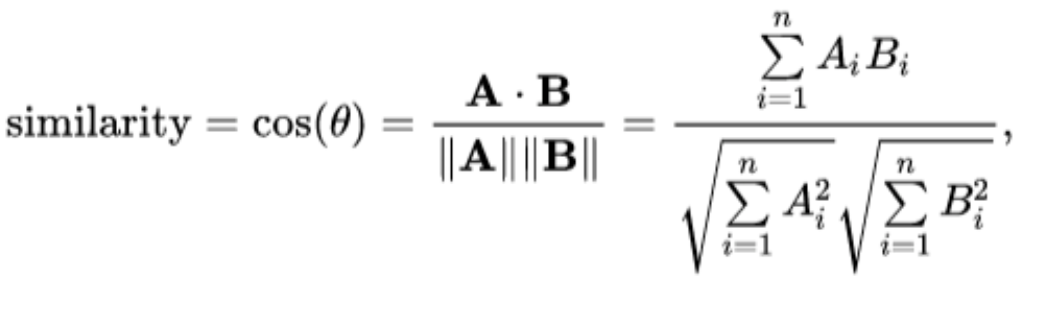

In [ ]:
import numpy as np
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

similarity = cosine_similarity(embed1, embed2)
print(f"Cosine Similarity: {similarity}")

Cosine Similarity: 0.9450731250303134


### vector store

In [ ]:
from langchain_chroma import Chroma
from langchain_community.embeddings.sentence_transformer import (
    SentenceTransformerEmbeddings,
)

#vector_store = Chroma.from_documents(text_recu_splitter, embedding_model )

vector_store = Chroma.from_documents(
   text_recu_splitter,
   embedding_model,
   persist_directory = "/content/chroma_langchain_db",
   collection_name="resume_rag",
   #distance_metric = "cos" # by default you can use "ip"(inner product) for dot product or L2 for(Euclidean distance)
)
print("Number of documents in initial load:", len(text_recu_splitter))

Number of documents in initial load: 113


In [ ]:
vs_retriever = vector_store.as_retriever(k=3)

texts = vector_store.get()['documents']
metadatas = vector_store.get()["metadatas"]

In [ ]:
texts

#### test simple vector store

In [ ]:
from langchain.vectorstores import Chroma
db = Chroma(
    collection_name="simple_rag",
    embedding_function=embedding_model,
    persist_directory="/content/test_chroma",
)

<ipython-input-23-54f61de61038>:2: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  db = Chroma(


In [ ]:
from uuid import uuid4

from langchain_core.documents import Document

document_1 = Document(
    page_content="hello my name is arbi a student at supcom and now i am hosting a rag workshop ",
    metadata={"source": "arbi"},
    id=1,
)

document_2 = Document(
    page_content="aziz is a student at FSS ",
    metadata={"source": "aziz"},
    id=2,
)

document_3 = Document(
    page_content="siwar is a teacher who teach arbi ",
    metadata={"source": "siwar"},
    id=3,
)
documents = [
    document_1,
    document_2,
    document_3,
    ]
uuids = [str(uuid4()) for _ in range(len(documents))]
db.add_documents(documents=documents, ids=uuids)

['56fff372-e0ba-45f8-a998-f748ed1f620d',
 'dba35bb5-f554-41c6-8854-0888b7d9f46c',
 'a5e7d55e-3680-4c50-b3e0-99c0b0a0e9fa']

In [ ]:
results = db.similarity_search("who is arbi", k = 2)
print(results)

[Document(metadata={'source': 'siwar'}, page_content='siwar is a teacher who teach arbi '), Document(metadata={'source': 'arbi'}, page_content='hello my name is arbi a student at supcom and now i am hosting a rag workshop ')]


In [ ]:
results = db.similarity_search_with_score("who is arbi", k = 2)
print(results)

[(Document(metadata={'source': 'siwar'}, page_content='siwar is a teacher who teach arbi '), 0.8376447146950833), (Document(metadata={'source': 'arbi'}, page_content='hello my name is arbi a student at supcom and now i am hosting a rag workshop '), 1.5469711145954455)]


In [ ]:
results = vector_store.similarity_search_with_score("what supcom", k = 2)
print(results)

[(Document(id='4ccc085d-449e-4956-8b4f-5c5e5b2f5bd7', metadata={'author': 'Mohamed Arbi Nsibi', 'creationdate': '2025-02-02T23:34:38+00:00', 'creator': "LaTeX with 'moderncv' package", 'keywords': 'Mohamed Arbi Nsibi , curriculum vitæ, résumé', 'moddate': '2025-02-02T23:34:38+00:00', 'page': 0, 'page_label': '1', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': '/content/Mohamed_ARBI_Nsibi_EN.pdf', 'subject': 'Résumé of Mohamed Arbi Nsibi', 'title': 'Mohamed Arbi Nsibi  –', 'total_pages': 2, 'trapped': '/False'}, page_content='(SUP’COM) 2022-2024'), 1.2340093851089478), (Document(id='46c19f7c-69f5-4775-a91a-e05f5db5cae1', metadata={'author': 'Mohamed Arbi Nsibi', 'creationdate': '2025-02-02T23:34:38+00:00', 'creator': "LaTeX with 'moderncv' package", 'keywords': 'Mohamed Arbi Nsibi , curriculum vitæ, résumé', 'moddate': '2025-02-02T23:34:38+00:00', 'page': 1, 'page_label': '2', 'producer

In [ ]:
# query it
query= "what is supcom ?"
results = vector_store.similarity_search(query)
results

[Document(id='4ccc085d-449e-4956-8b4f-5c5e5b2f5bd7', metadata={'author': 'Mohamed Arbi Nsibi', 'creationdate': '2025-02-02T23:34:38+00:00', 'creator': "LaTeX with 'moderncv' package", 'keywords': 'Mohamed Arbi Nsibi , curriculum vitæ, résumé', 'moddate': '2025-02-02T23:34:38+00:00', 'page': 0, 'page_label': '1', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': '/content/Mohamed_ARBI_Nsibi_EN.pdf', 'subject': 'Résumé of Mohamed Arbi Nsibi', 'title': 'Mohamed Arbi Nsibi  –', 'total_pages': 2, 'trapped': '/False'}, page_content='(SUP’COM) 2022-2024'),
 Document(id='46c19f7c-69f5-4775-a91a-e05f5db5cae1', metadata={'author': 'Mohamed Arbi Nsibi', 'creationdate': '2025-02-02T23:34:38+00:00', 'creator': "LaTeX with 'moderncv' package", 'keywords': 'Mohamed Arbi Nsibi , curriculum vitæ, résumé', 'moddate': '2025-02-02T23:34:38+00:00', 'page': 1, 'page_label': '2', 'producer': 'pdfTeX-1.40.25', '

### Prompt template

In [ ]:
from langchain import PromptTemplate

# write a prompt for a customer support chatbot that answer questions using infos extracted from our db

template = """you are an exceptional support chatbot that gently answer questions based on my resume and you will speak on my behalf.


you know the following context information
{chunks_formatted}
answer the following question from a customer. use only information from the previous context information .
do not invent stuff.
Question : {query}
Answer : """

prompt = PromptTemplate(
    input_variables =["chunks_formatted","query" ],
    template = template
)


In [ ]:
from google.colab import userdata
GROQ_API_KEY = userdata.get('GROQ_API_KEY')

### final chain

In [ ]:
from langchain_groq import ChatGroq
#full pipeline
query = "what is your name?"
# retreive relevant chunks
docs = vector_store.similarity_search(query)
retreived_docs = [doc.page_content for doc in docs]

chunks_formatted = "\n\n".join(retreived_docs)

# format the prompt
prompt_f = prompt.format(chunks_formatted=chunks_formatted, query=query)

# generate answer
llm = ChatGroq(
    temperature=0.3,
    model= "llama-3.1-8b-instant", #"llama-3.3-70b-versatile",#"llama3-70b-8192",
    api_key= GROQ_API_KEY,
)

In [ ]:
answer = llm.invoke(prompt_f) # invoke # generate
#answer = llm.predict(prompt_f)
answer

AIMessage(content='My name is Mohammed Arbi Nsibi.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 153, 'total_tokens': 164, 'completion_time': 0.014666667, 'prompt_time': 0.005666226, 'queue_time': 0.237362218, 'total_time': 0.020332893}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_08ee3c3619', 'finish_reason': 'stop', 'logprobs': None}, id='run-ff0ea857-eb56-4bd7-a577-d6a5eb35b0db-0', usage_metadata={'input_tokens': 153, 'output_tokens': 11, 'total_tokens': 164})

In [ ]:
from langchain_core.output_parsers import StrOutputParser

parser = StrOutputParser()

chain = llm | parser
print(chain.invoke(prompt_f))

My name is Mohammed Arbi Nsibi.


### Let's make an interface
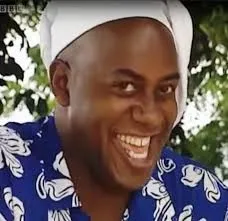

In [ ]:
import gradio as gr
llm = ChatGroq(
    temperature=0.2,
    model= "llama-3.1-8b-instant",#"llama-3.3-70b-versatile", #"llama3-70b-8192",
    api_key= GROQ_API_KEY,
)

def predict(query):
  docs = vector_store.similarity_search(query)
  retreived_docs = [doc.page_content for doc in docs]
  chunks_formatted = "\n\n".join(retreived_docs)
  # format the prompt

  prompt_f = prompt.format(chunks_formatted=chunks_formatted, query=query)
  answer = llm.predict(prompt_f)
  return answer


gr.Interface( fn = predict , inputs = "text", outputs = "text").launch()



Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bcf234c31ac7ca745f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
